<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/8_7_Densely_Connected_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.7 : Densely Connected Networks (DenseNet)

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
import torch.nn.functional as F

In [4]:
#@title conv_block
def conv_block(num_channels):
  return nn.Sequential(
      nn.LazyBatchNorm2d(), nn.ReLU(),
      nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
  )

In [6]:
a = []
for i in range(4):
  a.append(conv_block(20))

In [9]:
b = nn.Sequential(*a)
b

Sequential(
  (0): Sequential(
    (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (1): Sequential(
    (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (2): Sequential(
    (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (3): Sequential(
    (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU()
    (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [10]:
for blk in b:
  print(blk)

Sequential(
  (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): ReLU()
  (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): ReLU()
  (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): ReLU()
  (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
Sequential(
  (0): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): ReLU()
  (2): LazyConv2d(0, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [5]:
#@title DenseBlock
class DenseBlock(nn.Module):

  def __init__(self, num_convs, num_channels):
    super().__init__()
    layer = []
    for i in range(num_convs):
      layer.append(conv_block(num_channels))
    self.net = nn.Sequential(*layer)

  def forward(self, X):
    for blk in self.net:
      Y = blk(X)
      X = torch.cat((Y, X), dim=1)
    return X

In [7]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 6, 6)
Y = blk(X)
print(f"Y.shape = {Y.shape}")

Y.shape = torch.Size([4, 23, 6, 6])


In [17]:
from torchsummary import summary
summary(DenseBlock(10, 20).net, (3, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm2d-1            [-1, 3, 28, 28]               6
              ReLU-2            [-1, 3, 28, 28]               0
            Conv2d-3           [-1, 20, 28, 28]             560
       BatchNorm2d-4           [-1, 20, 28, 28]              40
              ReLU-5           [-1, 20, 28, 28]               0
            Conv2d-6           [-1, 20, 28, 28]           3,620
       BatchNorm2d-7           [-1, 20, 28, 28]              40
              ReLU-8           [-1, 20, 28, 28]               0
            Conv2d-9           [-1, 20, 28, 28]           3,620
      BatchNorm2d-10           [-1, 20, 28, 28]              40
             ReLU-11           [-1, 20, 28, 28]               0
           Conv2d-12           [-1, 20, 28, 28]           3,620
      BatchNorm2d-13           [-1, 20, 28, 28]              40
             ReLU-14           [-1, 20,

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
#@title transition_block
def transition_block(num_channels):
  return nn.Sequential(
      nn.LazyBatchNorm2d(), nn.ReLU(),
      nn.LazyConv2d(num_channels, kernel_size=1),
      nn.AvgPool2d(kernel_size=2, stride=2)
  )

In [8]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 3, 3])

In [20]:
a = nn.Sequential(nn.LazyLinear(20))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [21]:
a.add_module(f'1', nn.ReLU())
a

Sequential(
  (0): LazyLinear(in_features=0, out_features=20, bias=True)
  (1): ReLU()
)

In [7]:
class DenseNet(d2l.Classifier):

  def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4), lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())

    for i, num_convs in enumerate(arch):
      self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs, growth_rate))

      # the number of output channels in the previous dense block
      num_channels += growth_rate * num_convs

      # need to add a transition layer between each dense block so that it halfs the number of channels, width and height
      if i != len(arch)-1: # will not add a transition block at the end
        num_channels = num_channels // 2
        self.net.add_module(f"tran_blk{i+1}", transition_block(num_channels))

    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten(), nn.LazyLinear(num_classes)
    ))

    self.net.apply(d2l.init_cnn)


  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3), nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

using gpu : time = 6min 10sec

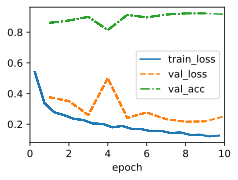

In [10]:
model = DenseNet(lr=0.1)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## Ex 8.7 : 

### Q1:

let's replace the AvgPool layer with MaxPool layer in transition layer

i don't see any discrepancies, performance is still the same, also the graph is much smoother

In [8]:
#@title Transition block with MaxPool layer
def transition_block_MP(num_channels):
  return nn.Sequential(
      nn.LazyBatchNorm2d(), nn.ReLU(),
      nn.LazyConv2d(num_channels, kernel_size=1),
      nn.MaxPool2d(kernel_size=2, stride=2)
  )

In [14]:
blk = DenseBlock(num_convs=2, num_channels=10)
X = torch.rand(4, 3, 6, 6)
Y = blk(X)
print(Y.shape)

torch.Size([4, 23, 6, 6])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [15]:
blk = transition_block_MP(10)
blk(Y).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([4, 10, 3, 3])

In [9]:
class DenseNet1(d2l.Classifier):

  def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4), lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())

    for i, num_convs in enumerate(arch):
      self.net.add_module(f"dense_blk{i+1}", DenseBlock(num_convs, growth_rate))

      num_channels += growth_rate * num_convs

      if i != len(arch)-1:
        num_channels = num_channels // 2
        self.net.add_module(f"trans_blk{i+1}", transition_block_MP(num_channels))

    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)
    ))

    self.net.apply(d2l.init_cnn)

  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=7, padding=3, stride=2), nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

  def forward(self, X):
    return self.net(X)

using gpu : time = 6min 1sec

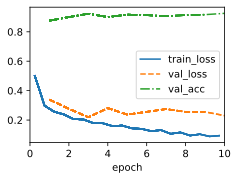

In [17]:
model = DenseNet1(lr=0.1)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

### Q2:

ResNet model's parameters takes 10 times more memory than that of DenseNet model

becuase in the ResNet model the number of channels are increasing continuously with not enough decrease in the dimensions of the image, so the memory keeps increasing

In [18]:
from torchsummary import summary
summary(DenseNet1(lr=0.1).net, (1, 96, 96), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           3,200
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
       BatchNorm2d-5           [-1, 64, 24, 24]             128
              ReLU-6           [-1, 64, 24, 24]               0
            Conv2d-7           [-1, 32, 24, 24]          18,464
       BatchNorm2d-8           [-1, 96, 24, 24]             192
              ReLU-9           [-1, 96, 24, 24]               0
           Conv2d-10           [-1, 32, 24, 24]          27,680
      BatchNorm2d-11          [-1, 128, 24, 24]             256
             ReLU-12          [-1, 128, 24, 24]               0
           Conv2d-13           [-1, 32, 24, 24]          36,896
      BatchNorm2d-14          [-1, 160,

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


let's check the same for resnet

In [10]:
class Residual(nn.Module):

  def __init__(self, num_channels, use_1x1conv=False, strides=1):
    super().__init__()
    self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=strides)
    self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)

    if use_1x1conv:
      self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
    else:
      self.conv3 = None

    self.bn1 = nn.LazyBatchNorm2d()
    self.bn2 = nn.LazyBatchNorm2d()

  def forward(self, X):
    Y = F.relu(self.bn1(self.conv1(X)))
    Y = self.bn2(self.conv2(Y))
    if self.conv3 is not None:
      X = self.conv3(X)
    return F.relu(Y+X) 

In [11]:
class ResNet(d2l.Classifier):

  def __init__(self, arch, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())

    for i, b in enumerate(arch):
      self.net.add_module(f"b{i+2}", self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)
    ))

  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=7, padding=3, stride=2), nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

  def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
      if i == 0 and not first_block:
        blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
      else:
        blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

  def forward(self, X):
    return self.net(X)

In [12]:
class ResNet18(ResNet):

  def __init__(self, lr=0.1, num_classes=10):
    arch = ((2, 64), (2, 128), (2, 256), (2, 512))
    super().__init__(arch, lr, num_classes)

In [24]:
summary(ResNet18(), (1, 96, 96), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           3,200
       BatchNorm2d-2           [-1, 64, 48, 48]             128
              ReLU-3           [-1, 64, 48, 48]               0
         MaxPool2d-4           [-1, 64, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          36,928
       BatchNorm2d-6           [-1, 64, 24, 24]             128
            Conv2d-7           [-1, 64, 24, 24]          36,928
       BatchNorm2d-8           [-1, 64, 24, 24]             128
          Residual-9           [-1, 64, 24, 24]               0
           Conv2d-10           [-1, 64, 24, 24]          36,928
      BatchNorm2d-11           [-1, 64, 24, 24]             128
           Conv2d-12           [-1, 64, 24, 24]          36,928
      BatchNorm2d-13           [-1, 64, 24, 24]             128
         Residual-14           [-1, 64,

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


### Q3:

In [27]:
summary(DenseNet1(lr=0.1).net, (1, 224, 224), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]          18,464
       BatchNorm2d-8           [-1, 96, 56, 56]             192
              ReLU-9           [-1, 96, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          27,680
      BatchNorm2d-11          [-1, 128, 56, 56]             256
             ReLU-12          [-1, 128, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]          36,896
      BatchNorm2d-14          [-1, 160,

### Q4:

let's try DenseNet-121 : crashed

In [29]:
arch = (6, 12, 48, 32)
model = DenseNet(num_channels=1, arch = arch, lr=0.1)
summary(model.net, (1, 224, 224), device='cpu')

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 32, 56, 56]          18,464
       BatchNorm2d-8           [-1, 96, 56, 56]             192
              ReLU-9           [-1, 96, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          27,680
      BatchNorm2d-11          [-1, 128, 56, 56]             256
             ReLU-12          [-1, 128, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]          36,896
      BatchNorm2d-14          [-1, 160,

In [ ]:
arch = (6, 12, 24, 16)
model = DenseNet(num_channels=1, arch = arch, lr=0.1)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(train=True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Q5:

In [14]:
def linear_blk(num_channels):
  return nn.Sequential(
      nn.LazyBatchNorm1d(), nn.ReLU(),
      nn.LazyLinear(num_channels)
  )

In [15]:
class DenseBlock_Linear(nn.Module):

  def __init__(self, num_convs, num_channels):
    super().__init__()
    layer = []
    for i in range(num_convs):
      layer.append(linear_blk(num_channels))
    self.net = nn.Sequential(*layer)

  def forward(self, X):
    for module in self.net:
      Y = self.net(X)
      X = torch.cat((Y, X), dim=1)
    return X